## LA Metro Bike Share (Exploratory Data Analysis)

In [10]:
# importing libraries
import pandas as pd # imported to load and manipulate data
import matplotlib.pyplot as plt # imported for data visualisation functions
import numpy as np # imported for additional statistical functions
import seaborn as sns #imported for additional data visualisation
#%matplotlib inline # inline magic command added to display plots 
import warnings 
warnings.filterwarnings('ignore') #suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

### 1.1 Understanding the Data 

The dataset 'metro.csv' used is sourced from the LA Metro Bike Share website, which provides a repository with comprehensive information on bicycle trips with the LA Metro Bike Share services. (Source: https://bikeshare.metro.net/about/data/) 
The dataset contains anonymised consumer data that captures various bicycle journeys with the service. The data file type, '.csv', adheres to the widely recognized comma-separated-values (CSV) format, ensuring  compatibility and ease of integration into the analytical framework. The use of data from a trusted source, formatted in a standardised manner, enhances the credibility of the analytical outcomes, affirming the quality of the insights generated. 

In [11]:
# Directory created for Jupyter Notebook.
# The Jupyter Notebook runs from the same space all other paths are relative to 
# The datafile "metro.csv" is addressed from the same space.

metrodata = pd.read_csv('./metro.csv',low_memory=False) #load datafile, set variable name for datafile 
metrodata.head() #returns first 'n' rows in datafile metrodata, default is n = '5'


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


The dataset comprises 15 distinct columns, with each row representing an individual bicycle journey with the LA Metro Bike Share between 7/1/2019 and 9/30/2019. Unique trip IDs are assigned to each trip, ensuring traceability for every record. Using the '.head()' feature, we display the initial five rows to obtain an indication of the dataset's contents.

Each column is accompanied by a header which succinctly outlines the nature of the data. This guide serves as a key reference during our analyses, enhancing the dataset's usability for effective interpretation. Understanding the organisational structure of the dataset lays a foundation for clarity and interpretability, forming a crucial building block for our analysis.

### 1.2 Data Preprocessing & Error Analysis 

For the early stages of our analysis, we conducted a comprehensive review of the dataset to identify any occurrences of missing or erroneous values. 

This step is carried out with the primary goal of maintaining the integrity and reliability of the dataset for further data analysis. Our focus here, lies specifically on investigating the characteristics and patterns associated with features that may exhibit missing values.

Through a meticulous assessment of the dataset's completeness, we identify potential gaps or inaccuracies that could compromise the robustness of subsequent analytical processes. This proactive approach to ensuring data quality serves as a crucial foundation for generating meaningful and accurate insights. 


In [12]:
metrodata.isna().sum 

<bound method NDFrame._add_numeric_operations.<locals>.sum of        trip_id  duration  start_time  end_time  start_station  start_lat  \
0        False     False       False     False          False      False   
1        False     False       False     False          False      False   
2        False     False       False     False          False      False   
3        False     False       False     False          False      False   
4        False     False       False     False          False      False   
...        ...       ...         ...       ...            ...        ...   
92119    False     False       False     False          False      False   
92120    False     False       False     False          False      False   
92121    False     False       False     False          False      False   
92122    False     False       False     False          False      False   
92123    False     False       False     False          False      False   

       start_lon  end_sta

We systematically conduct the data cleansing process, carefully removing rows containing these identified issues. 

The application of this data cleansing technique aims to minimise potential disruptions in subsequent analyses, visualisations and interpretations. The removal of rows with missing values is executed thoughtfully to uphold the overall integrity of the dataset, aligning with established best practices in data preprocessing. 

This thorough cleansing process plays a vital role in creating a refined and reliable dataset, establishing a solid foundation for accurate and meaningful insights as we progress through the subsequent stages of our analysis.

In [13]:
#overview of the metrodata file before and after removing the missing values 

print("Before removing the rows with missing / 'NaN' values:\n", metrodata) 

metrodata2 = metrodata.dropna() #dataset after removing any rows with Nan values or no data

print("After removing the rows with missing / 'NaN' values:\n", metrodata2)

Before removing the rows with missing / 'NaN' values:
          trip_id  duration       start_time         end_time  start_station  \
0      124657107         5    7/1/2019 0:04    7/1/2019 0:09           4312   
1      124657587         9    7/1/2019 0:07    7/1/2019 0:16           3066   
2      124658068         5    7/1/2019 0:20    7/1/2019 0:25           4410   
3      124659747        20    7/1/2019 0:44    7/1/2019 1:04           3045   
4      124660227        27    7/1/2019 0:44    7/1/2019 1:11           3035   
...          ...       ...              ...              ...            ...   
92119  130053092         8  9/30/2019 23:32  9/30/2019 23:40           3038   
92120  130053090        15  9/30/2019 23:38  9/30/2019 23:53           4401   
92121  130053089         1  9/30/2019 23:40  9/30/2019 23:41           3038   
92122  130053088        22  9/30/2019 23:41   10/1/2019 0:03           3067   
92123  130053087         4  9/30/2019 23:58   10/1/2019 0:02           4417 

In [14]:
metrodata2.shape # displays (rows,columns)

(86760, 15)

Our initial dataset contained 92,124 rows. After cleansing the dataset by removing any rows with missing values, we find that our dataset now contains 86,760 rows. 

This reduction in the number of rows shows we've effectively removed incomplete or unreliable data, leading to a more dependable dataset for our upcoming analyses. The careful elimination of rows with missing data ensures that our analytical efforts are grounded in trustworthy and complete information. 

### 1.3 Data Characteristics 

#### 1.3.1 Statistical Analysis 

By examining features such as averages and ranges, we can obtain a statistical understanding of our dataset. The statistical information lays a foundation for identifying overall trends and characteristics, potentially guiding us towards more informed decisions and insights, perhaps even prompting further analysis.

This simple statistical exploration serves as a bridge between cleaning up the data and delving into more detailed analyses.  We can calculate the mean trip duration using the pandas library, which we imported earlier. The results are presented with a precision of 2 and 3 decimal places.

In [15]:
metrodata2['duration'] #overview of the duration column 

0         5
1         9
2         5
3        20
4        27
         ..
92118    14
92119     8
92120    15
92121     1
92122    22
Name: duration, Length: 86760, dtype: int64

In [16]:
print("Mean Trip duration to 2 decimal places:",round(metrodata2.duration.mean(),2)) #print mean duration and round off to 2 dp
print("Mean Trip duration to 3 decimal places:",round(metrodata2.duration.mean(),3)) #print mean duration and round off to 3 dp

Mean Trip duration to 2 decimal places: 27.0
Mean Trip duration to 3 decimal places: 26.996


We also look into other statistical features for the duration column, this time using the NumPy library.

In [17]:
print("Standard deviation for the Trip duration:",round(np.std(metrodata2['duration']),2)) #standard deviation calculation using numpy library 
print("Mean Trip duration (using NumPy):",round(np.mean(metrodata2['duration']),3)) #mean calculation using numpy library 
print("Median Trip duration:",np.median(metrodata2['duration'])) #median calculation using numpy library 
print("Maximum Trip duration:",np.max(metrodata2['duration'])) #maximum trip duration 
print("Minimum Trip duration:",np.min(metrodata2['duration'])) #minimum trip duration 
print("Range for Trip durations:",np.max(metrodata2['duration']) - np.min(metrodata2['duration']))

Standard deviation for the Trip duration: 95.72
Mean Trip duration (using NumPy): 26.996
Median Trip duration: 11.0
Maximum Trip duration: 1440
Minimum Trip duration: 1
Range for Trip durations: 1439


In the previous section, we calculated the range of the distribution. Now, using the method below, we also calculate the quantiles for the duration column to gain further insight into the spread of the distribution. 

In [18]:
#calculating quantiles for the duration

metrodata2['duration'].quantile([0.25, 0.5, 0.75]) 

0.25     6.0
0.50    11.0
0.75    21.0
Name: duration, dtype: float64

In [19]:
Q1, Q3 = np.percentile((metrodata2['duration']), [25, 75],axis =0)
print("Q1 for Trip duration:",Q1) # print first quantile 
print("Q3 for Trip duration:",Q3) # print third quantile 
print("IQR for Trip duration:", Q3 - Q1) #print Interquartile Range 

Q1 for Trip duration: 6.0
Q3 for Trip duration: 21.0
IQR for Trip duration: 15.0


The statistical measures for the mean, computed using both the NumPy and pandas libraries, yield consistent results, indicating alignment in the calculated values between the two seperate libraries. The median trip duration for the 86,760 trips is determined to be 11 minutes, seemingly implying a prevalence of relatively shorter commutes. However, the minimum trip duration of 1 minute could be a potential outlier, possibly suggesting an accidental bike rental with the service.

The Interquartile Range (IQR), along with the first (Q1) and third (Q3) quartiles, presents a rather unusual pattern, especially considering the notably high maximum value for the duration. This discrepancy prompts further investigation into the dataset's distribution and potential outliers. Comparable values for quantiles using the NumPy library reinforce the consistency of the calculated statistics.

This analysis underscores the importance of delving deeper into the dataset's characteristics to identify any anomalies or outliers that might impact the interpretation of the statistical summary. Further exploration and data visualisation techniques could also provide insights into the distribution and patterns within the data.


Additionally, we can derive statistical summaries for the dataset by utilising the '.describe()' feature. This function provides key metrics such as mean, standard deviation, and quartile values, offering a comprehensive overview of the central tendencies and dispersion of the numerical attributes for the entire dataset. 

By leveraging these statistics, we can further deepen our understanding of the dataset's characteristics and provide a more informed analysis going forward.

In [20]:
#generate statitical table for the entire dataset

metrodata2.describe() 

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,8.676000e+04,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000
mean,1.274167e+08,26.996404,3445.616367,34.035340,-118.283984,3449.219006,34.035114,-118.284264,59.330440
std,1.526039e+06,95.720579,597.544205,0.058808,0.069444,598.836056,0.058812,0.070127,108.474264
min,1.246571e+08,1.000000,3005.000000,33.710979,-118.495422,3005.000000,33.710979,-118.495422,1.000000
25%,1.261132e+08,6.000000,3028.000000,34.038609,-118.279762,3028.000000,34.038609,-118.280182,30.000000
50%,1.274679e+08,11.000000,3052.000000,34.046822,-118.258537,3052.000000,34.046810,-118.258537,30.000000
75%,1.287317e+08,21.000000,4250.000000,34.051941,-118.248253,4250.000000,34.051941,-118.247490,30.000000
max,1.303877e+08,1440.000000,4453.000000,34.177662,-118.231277,4453.000000,34.177662,-118.231277,999.000000


#### 1.3.2 Station Longitudes & Lattitudes 

From the earlier snapshot of the dataset, we can observe that the station numbers for the service are indicated by columns labeled 'start_station' and 'end_station', respectively. Each start and end station carries a unique latitude and longitude combination, representing distinct locations. We note that the station locations are dependent variables, and we assume that each start station can also be an end station and vice-versa.

Analysing the station latitudes and longitudes can be valuable. Identifying the station locations relative to each other is useful for the company to pinpoint where future locations are installed. From the analysis below, we find that the minimum and maximum latitude and longitude coordinates for both start and end stations are equal. 

In [21]:
#### Computing min and max latitudes & longitudes
min_value_startlat = metrodata2.start_lat.min() #min value for start latitude
max_value_startlat = metrodata2.start_lat.max() #max value for start latitude
min_value_startlon = metrodata2.start_lon.min() #min value for start longitude
max_value_startlon = metrodata2.start_lon.max() #max value for start longitude

min_value_endlat = metrodata2.end_lat.min() #min value for end latitude
max_value_endlat = metrodata2.end_lat.max() #max value for the end latitude
min_value_endlon = metrodata2.end_lon.min() #min value for end longitude
max_value_endlon = metrodata2.end_lon.max() #max value for end longitude

print("Minimum start latitude:",min_value_startlat)
print("Maximum start latitude:",max_value_startlat)
print("Minimum end latitude:",min_value_endlat)
print("Maximum end latitude:", max_value_endlat)

print("Minimum start longitude:",min_value_startlon)
print("Maximum start longitude:",max_value_startlon)
print("Minimum end longitude:",min_value_endlon)
print("Maximum end longitude:", max_value_endlon)

#Combining our results
#min start latitude, min start longitude - 33.710979, -118.495422, 
#max start latitude, max start longitude - 34.177662, -118.231277
#min end latitude + min end  longitude - 33.710979, -118.495422
#max end latitude + max end  longitude -34.177662, -118.231277


Minimum start latitude: 33.710979
Maximum start latitude: 34.177662
Minimum end latitude: 33.710979
Maximum end latitude: 34.177662
Minimum start longitude: -118.495422
Maximum start longitude: -118.231277
Minimum end longitude: -118.495422
Maximum end longitude: -118.231277


Further investigation using the method below confirms that no specific station ID corresponds to these maximum and minimum latitude and longitude combinations. It is highly likely that these location coordinates correspond to different station numbers. 

In [22]:
max_test_latitude = max_value_startlat
max_test_longitude = max_value_startlon

# Filtering the dataset based on the maximum latitude and longitude values
matching_rows = metrodata2[(metrodata2['start_lat'] == max_test_latitude) & (metrodata2['start_lon'] == max_test_longitude)]

# Extracting the corresponding start and end station ID 
start_station_numbers = matching_rows['start_station'].unique()
end_station_numbers = matching_rows['end_station'].unique()

print(f"Start Station Numbers: {start_station_numbers}")  # f-string method to print results
print(f"End Station Numbers: {end_station_numbers}")

Start Station Numbers: []
End Station Numbers: []


In [23]:
min_test_latitude = min_value_startlat
min_test_longitude = min_value_startlon

# Filtering the dataset based on the minimum latitude and longitude values
matching_rows = metrodata2[(metrodata2['start_lat'] == min_test_latitude) & (metrodata2['start_lon'] == min_test_longitude)]

# Extracting the corresponding start and end station ID 
start_station_numbers = matching_rows['start_station'].unique()
end_station_numbers = matching_rows['end_station'].unique()

print(f"Start Station Numbers: {start_station_numbers}")
print(f"End Station Numbers: {end_station_numbers}")

Start Station Numbers: []
End Station Numbers: []


### 1.4 Data Visualisation

#### 1.4.1 Scatter Plots

Data visualisation can aid in constructing narratives around our data or presenting it into a form that is easier to understand, highlighting the trends and outliers. Scatter plots, in particular, are valuable for visualising relationships between variables, revealing patterns, trends, or possible correlations within the dataset. We generate scatter plots for our dataset from the method below. 

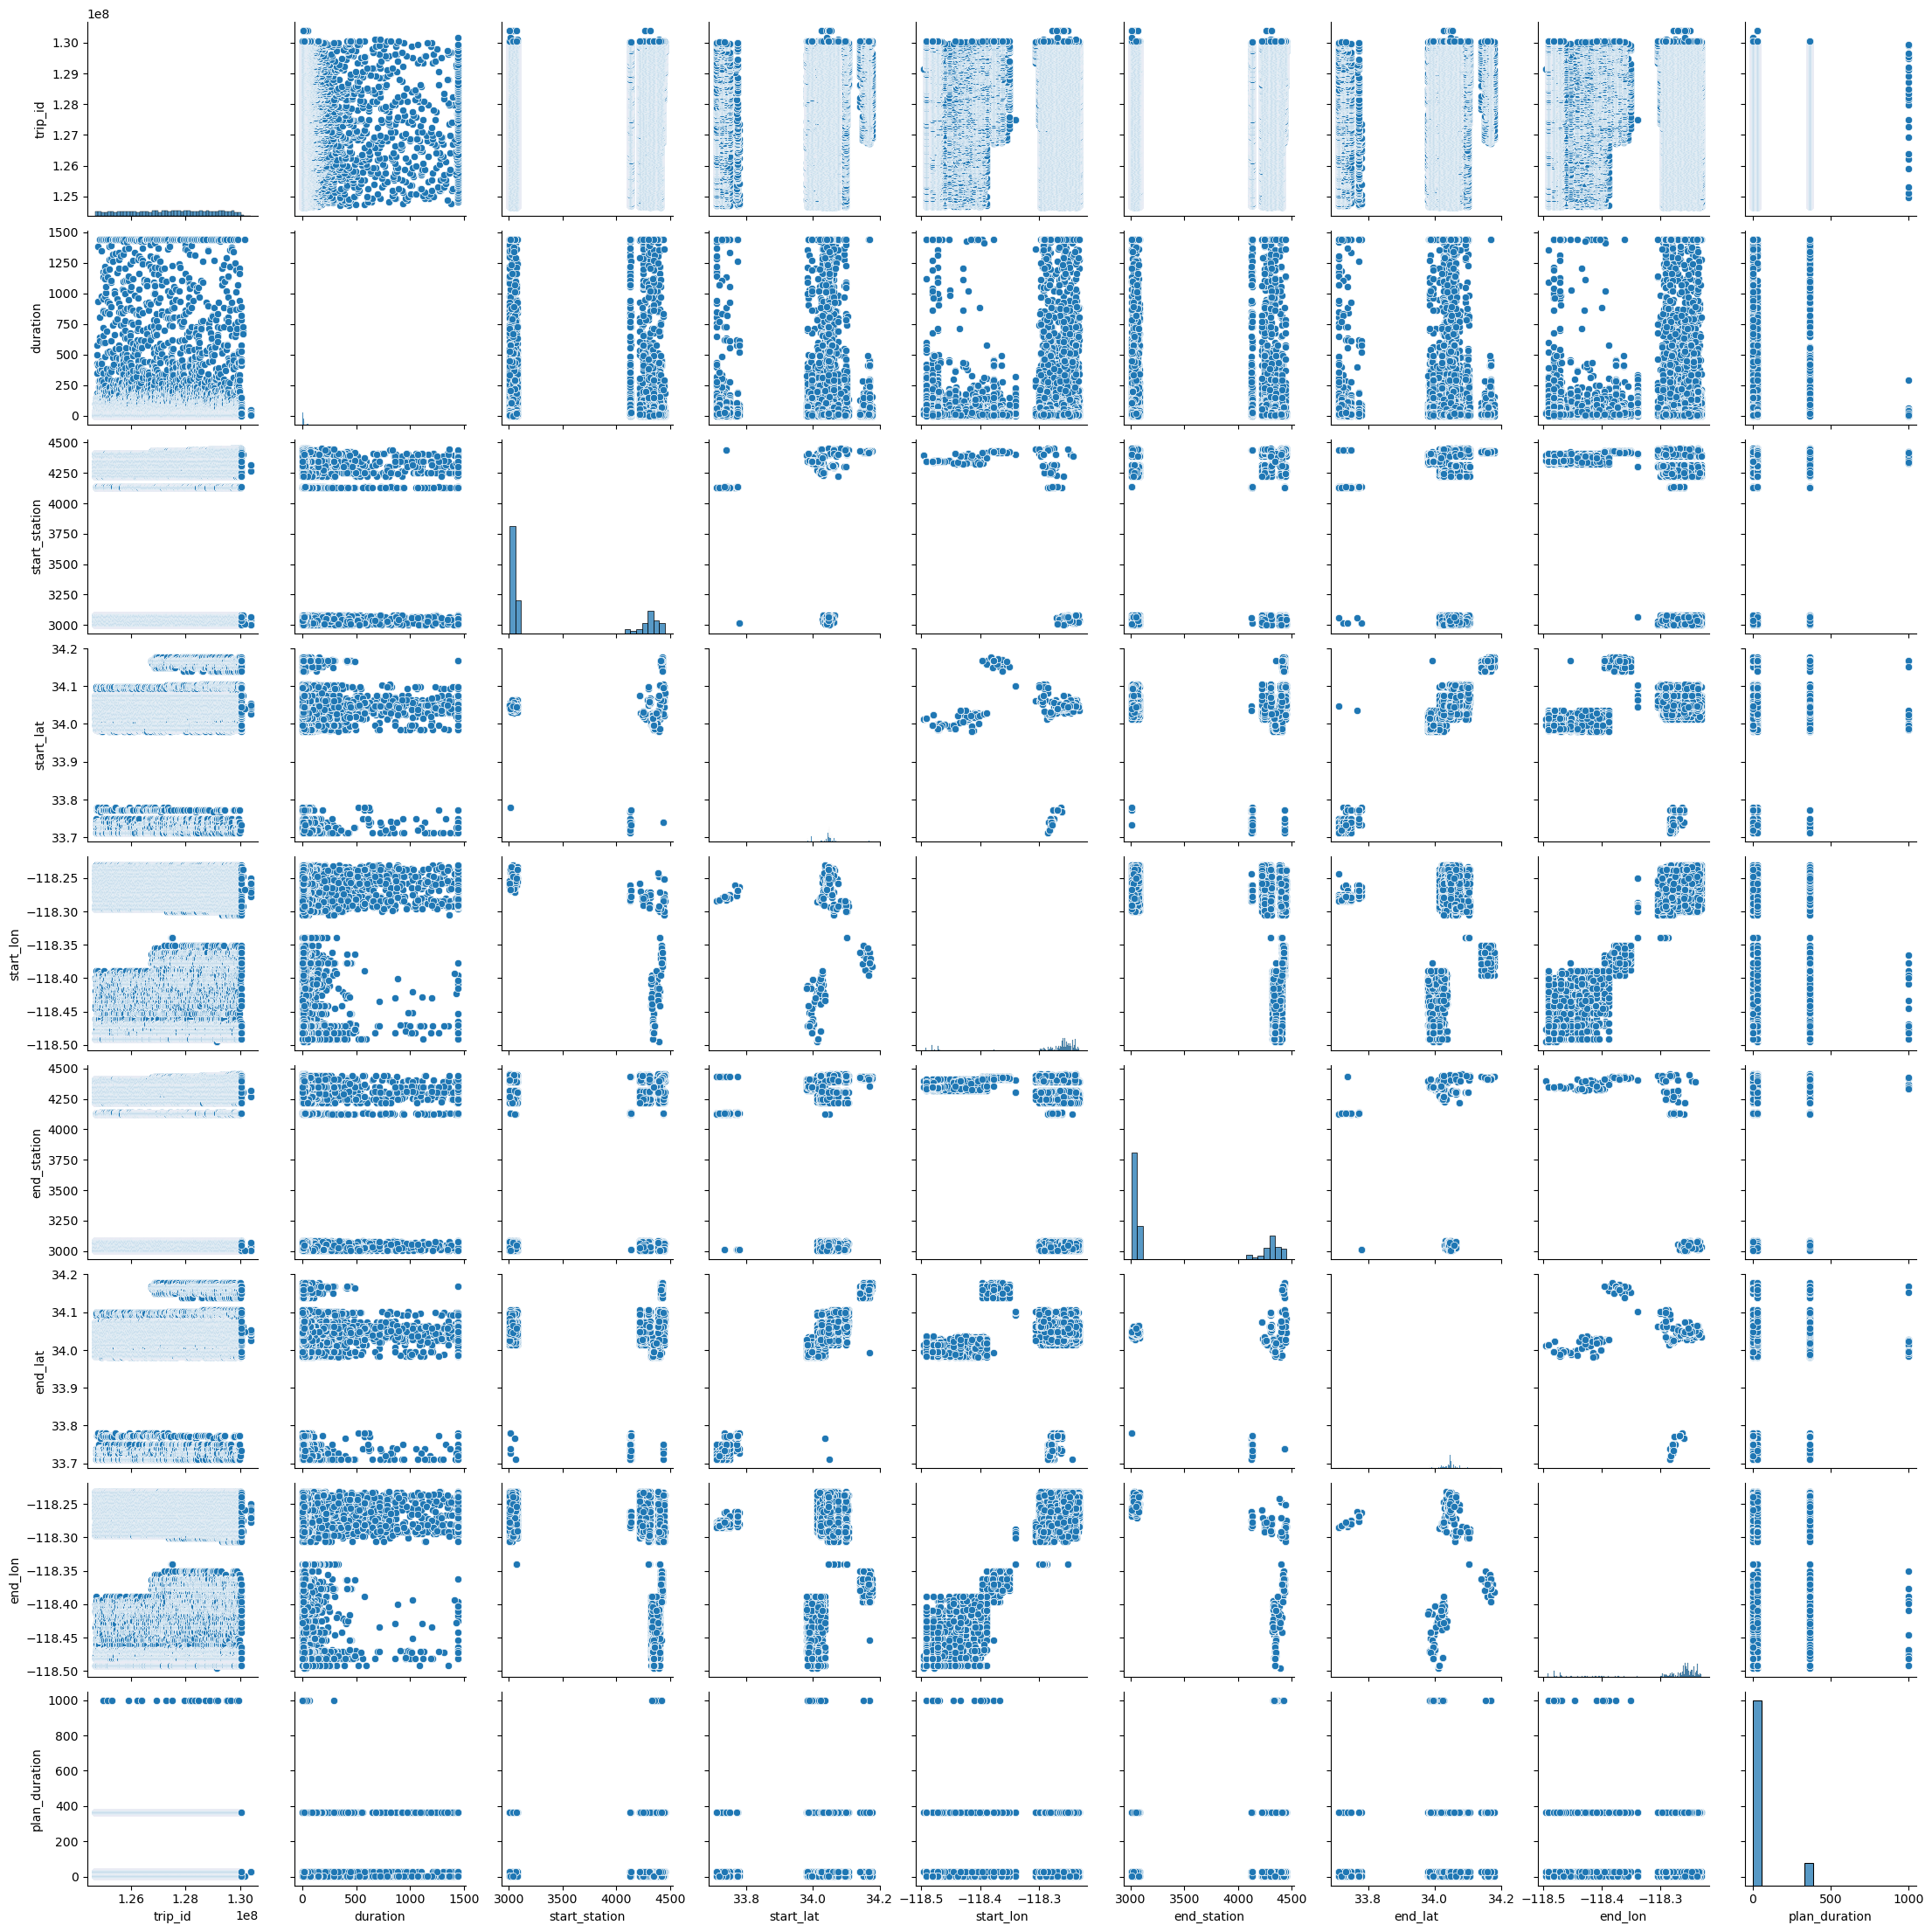

In [24]:
sns.pairplot(metrodata2) #code to generate a series of scatter plots for the metro data

The scatter plots are useful for assessing the strength and direction of the correlation between variables. The slope and direction of the points in the scatter plot indicate the nature of the relationship - whether it's positive, negative, or shows no correlation.

#### 1.4.2 Correlation Heatmap

We also explore the correlation between selected features in the dataset to unveil potential relationships and dependencies. 

The chosen columns, including 'duration', 'start latitude' (start lat), 'start longitude' (start_lon), 'end latitude' (end_lat), 'end longitude' (end_lon),' and 'plan duration', represent key aspects of each bicycle trip. 

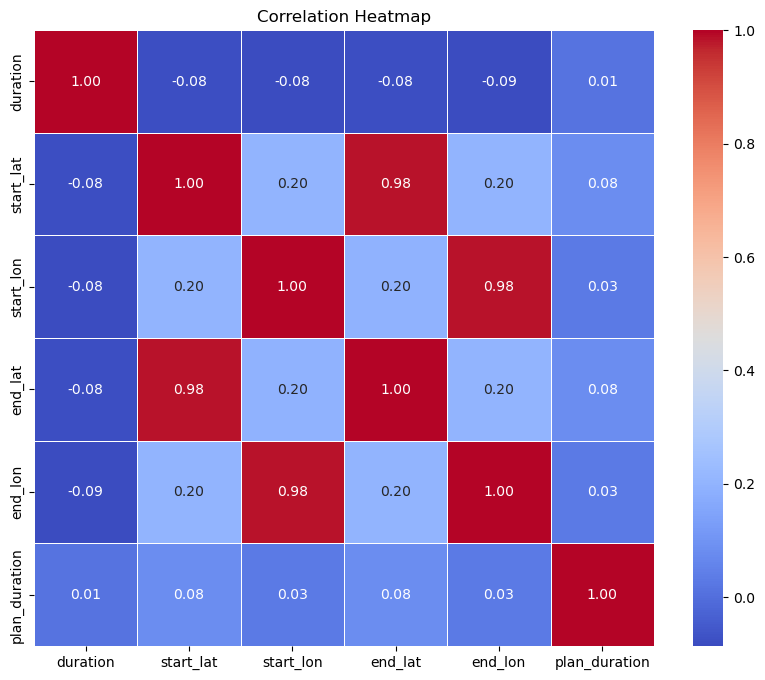

In [25]:
# Selecting the relevant columns from the dataset for the correlation analysis
selected_columns_corr = ['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'plan_duration']

# Subset of the dataset with selected columns
correlation_data = metrodata2[selected_columns_corr] 

# Correlation matrix calculation and heatmap plot
correlation_matrix = correlation_data.corr() 
plt.figure(figsize=(10, 8)) # Setting the figure size for better visualisation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap') # plot title 
plt.show() # show plot

Visualising the correlation matrix through a heatmap allows us to identify patterns and comprehend the degree of association between these selected variables. 

This exploration provides valuable insight into how different factors can influence or correlate with each other within the context of bike-sharing journeys.

The correlation heatmap shows high positive correlation coefficients between:

1) Start Latitude (start_lat) and End Latitude (end_lat): This suggests that trips or data points are highly likely to have similar starting and ending latitudes. This could imply that trips, once initiated are relatively localized in the north-south direction or occur within a narrow range of latitude.

2) Start Longitude (start_lon) and End Longitude (end_lon): Similarly, this strong correlation indicates that the start and end longitudes of trips are closely related, implying limited variation in the east-west direction once a trip is initiated.


#### 1.4.3 Duration Histogram 

Creating a histogram is a valuable technique which can enhance our understanding of the distributions in our dataset. More specifically, histograms can provide a detailed visual representation by presenting the frequency of data points within specific intervals or bins. This graphical tool can reveal the shape and central tendency of the data points, and also highlight patterns, outliers, and underlying structures.


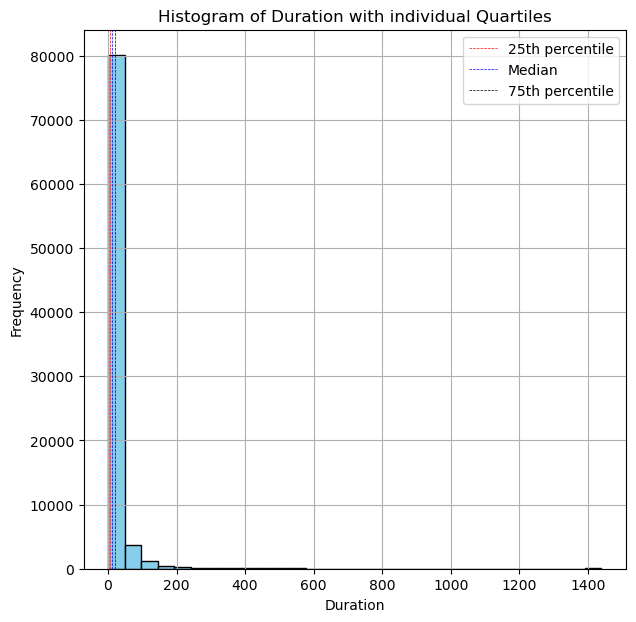

In [26]:
duration_stats = metrodata2['duration'].describe(percentiles=[.25, .5, .75])

# Histogram plot and quartiles
metrodata2['duration'].hist(figsize=(7,7), bins=30, color='skyblue', edgecolor='black')

# vertical dashed line to represent each individual quartile 
plt.axvline(duration_stats['25%'], color='red', linestyle='dashed', linewidth=0.5, label='25th percentile') 
plt.axvline(duration_stats['50%'], color='blue', linestyle='dashed', linewidth=0.5, label='Median')
plt.axvline(duration_stats['75%'], color='black', linestyle='dashed', linewidth=0.5, label='75th percentile')
plt.xlabel('Duration') # X-axis labels
plt.ylabel('Frequency') # Y-axis labels 
plt.title('Histogram of Duration with individual Quartiles') 
plt.legend()
plt.show()

Histograms effectively convey the spread of values across a range and provide a more granular perspective than summary statistics alone. By subdividing the data into intervals, histograms illustrate the density of occurrences, enabling the identification of peaks, tails, or clusters within the distribution.

Moreover, histograms complement other visualisation methods such as boxplots by offering a continuous view of the data density. This can be particularly insightful when exploring datasets with various patterns, asymmetries, or concentrations.

#### 1.4.4 Outlier Analysis 

Boxplots assist in visualising the spread of the data, showcasing some of the key metrics which we've seen before like the median, quartiles, and the presence of potential outliers.

The following method calculates the interquartile range (IQR) as a measure of data spread. A threshold (1.5*IQR) is defined to identify values beyond which data points are considered outliers. Outliers are identified based on points which lie outside this threshold. For further analysis, the outliers can be removed from the dataset, resulting in a new DataFrame without the identified outlier values.


Outliers in the 'duration' column:
       duration
14           98
36           44
133         427
135         930
160         151
...         ...
92097       726
92100       450
92111       151
92112      1440
92114       147

[7547 rows x 1 columns]


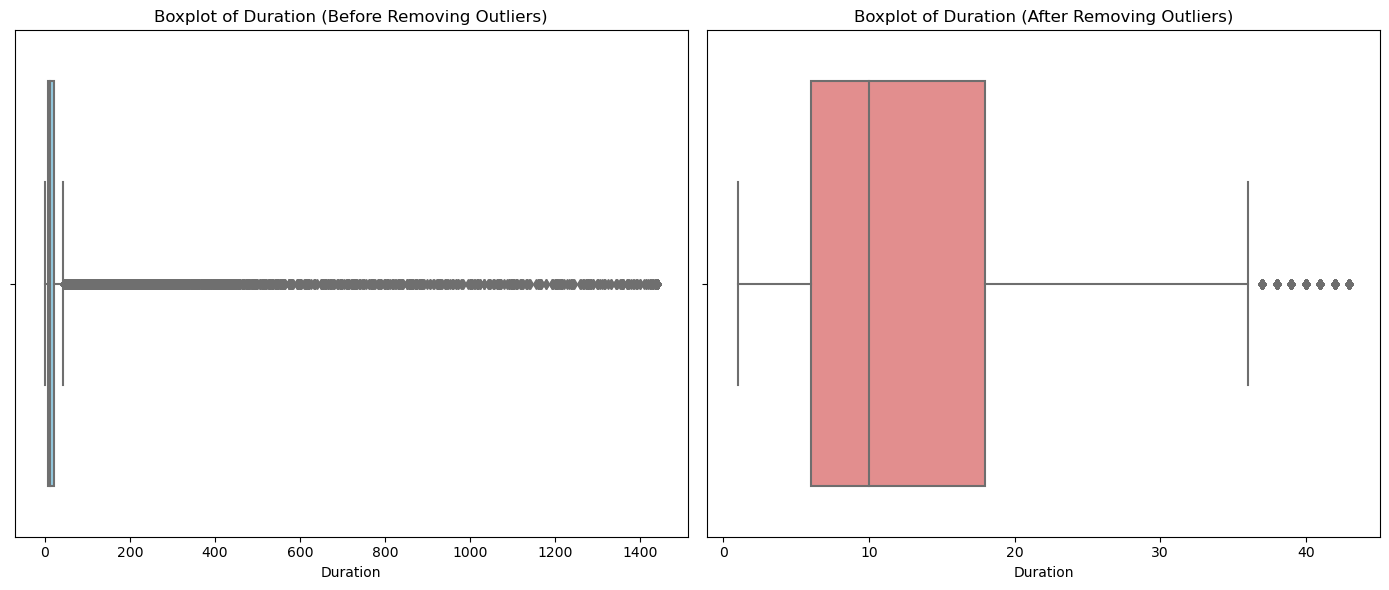

In [27]:
# Boxplots of duration distribution before removing outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # generate subplot for comparison 
sns.boxplot(x=metrodata2['duration'], color='skyblue')
plt.title('Boxplot of Duration (Before Removing Outliers)')
plt.xlabel('Duration')

# Outlier identification
Q1 = metrodata2['duration'].quantile(0.25)
Q3 = metrodata2['duration'].quantile(0.75)
IQR = Q3 - Q1
thres = 1.5 # Threshold defined for identifying outliers
outliers = metrodata2[(metrodata2['duration'] < Q1 - thres * IQR) | (metrodata2['duration'] > Q3 + thres * IQR)]

# Details of identified outliers for monitoring purposes
print("Outliers in the 'duration' column:")
print(outliers[['duration']])

# Removing outliers
metrodata2_no_outliers = metrodata2[~metrodata2['duration'].isin(outliers['duration'])] 

# Boxplot of duration distribution after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=metrodata2_no_outliers['duration'], color='lightcoral') #color 'lightcoral' distinguishes this boxplot from the one before outlier removal.
plt.title('Boxplot of Duration (After Removing Outliers)')
plt.xlabel('Duration')

plt.tight_layout() #optimise arrangement of subplots, ensuring a visually appealing display.
plt.show()

 The left subplot displays a boxplot representing the distribution, while the right subplot of the figure displays the new boxplot  after removing outliers.

The removal of outliers aims to address extreme values that might impact subsequent analyses. In summary, this method offers a comprehensive approach to handling outliers in the 'duration' column, involving visualisation, identification, removal, and subsequent visualisation of the refined distribution. We also compared the duration histogram and inspected the kernel desity after removing outliers. 

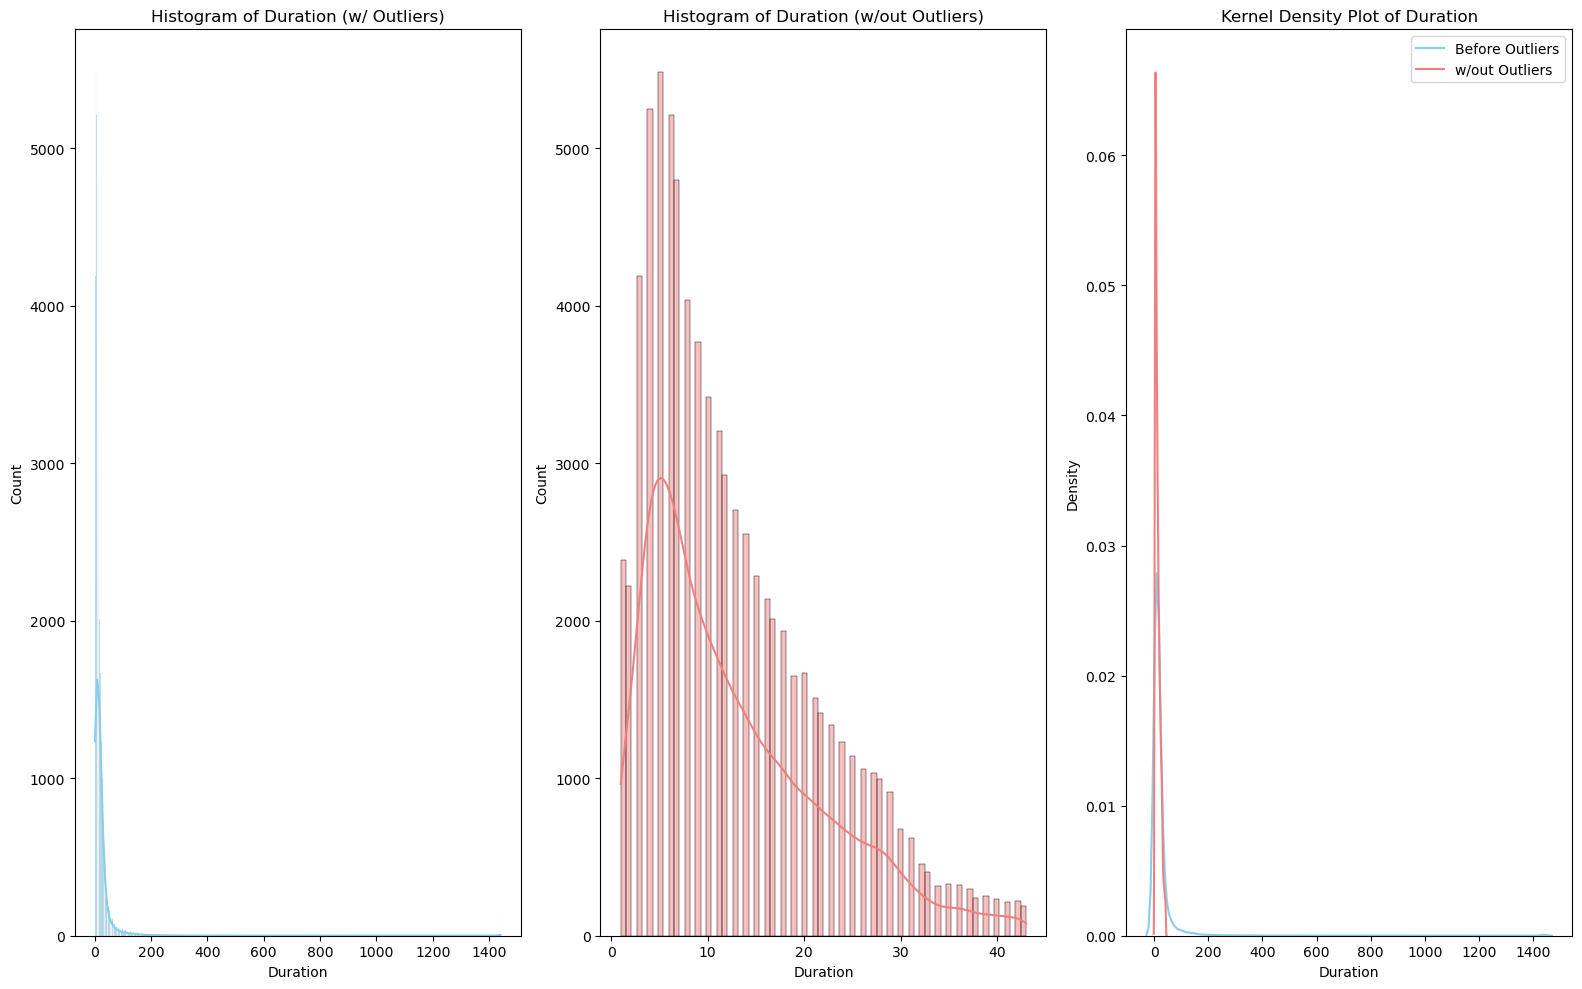

In [28]:
plt.figure(figsize=(16, 10))

# histogram before removing outliers
plt.subplot(1, 3, 1)
sns.histplot(metrodata2['duration'], kde=True, color='skyblue')
plt.title('Histogram of Duration (w/ Outliers)')
plt.xlabel('Duration')

# histogram after removing outliers
plt.subplot(1, 3, 2)
sns.histplot(metrodata2_no_outliers['duration'], kde=True, color='lightcoral')
plt.title('Histogram of Duration (w/out Outliers)')
plt.xlabel('Duration')

# Kernel density plot
plt.subplot(1, 3, 3)
sns.kdeplot(metrodata2['duration'], color='skyblue', label='Before Outliers')
sns.kdeplot(metrodata2_no_outliers['duration'], color='lightcoral', label='w/out Outliers')
plt.title('Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.legend() #helps differentiate between the distribution before outliers were removed and the refined distribution
plt.tight_layout()
plt.show()

The first subplot on the left displays the histogram of the 'duration' column before outlier removal, offering a visual representation of the frequency of different duration values. The predominant peak indicates the most common duration range.

The second subplot in the middle illustrates a histogram of the 'duration' column after removing outliers. Comparing this histogram with the previous one allows us to observe changes in the distribution shape and concentration, suggesting an influence on the peak or central tendency.

The third subplot on the right presents a kernel density plot comparing the distributions before and after removing outliers. The overlapping KDEs offer a clearer view of how the central tendencies and shapes of the distributions differ. Divergence or convergence areas indicate changes in the data distribution due to removing outliers.

#### 1.4.5 Boxplots

We generate additional boxplots to delve into the distribution of trip durations across different categorical variables in the dataset. 

The first boxplot delves into the distribution of trip durations based on passholder type, offering insights into trip durations for the six distinct passholder plans available. The second boxplot explores duration distribution across trip group categories, providing clarity on differences in trip durations between the 'One way' and 'Round Trip' categories. 

Finally, the third boxplot examines the distribution of duration by bike type, visually representing variations in trip duration across the three types of bikes offered by the service. 


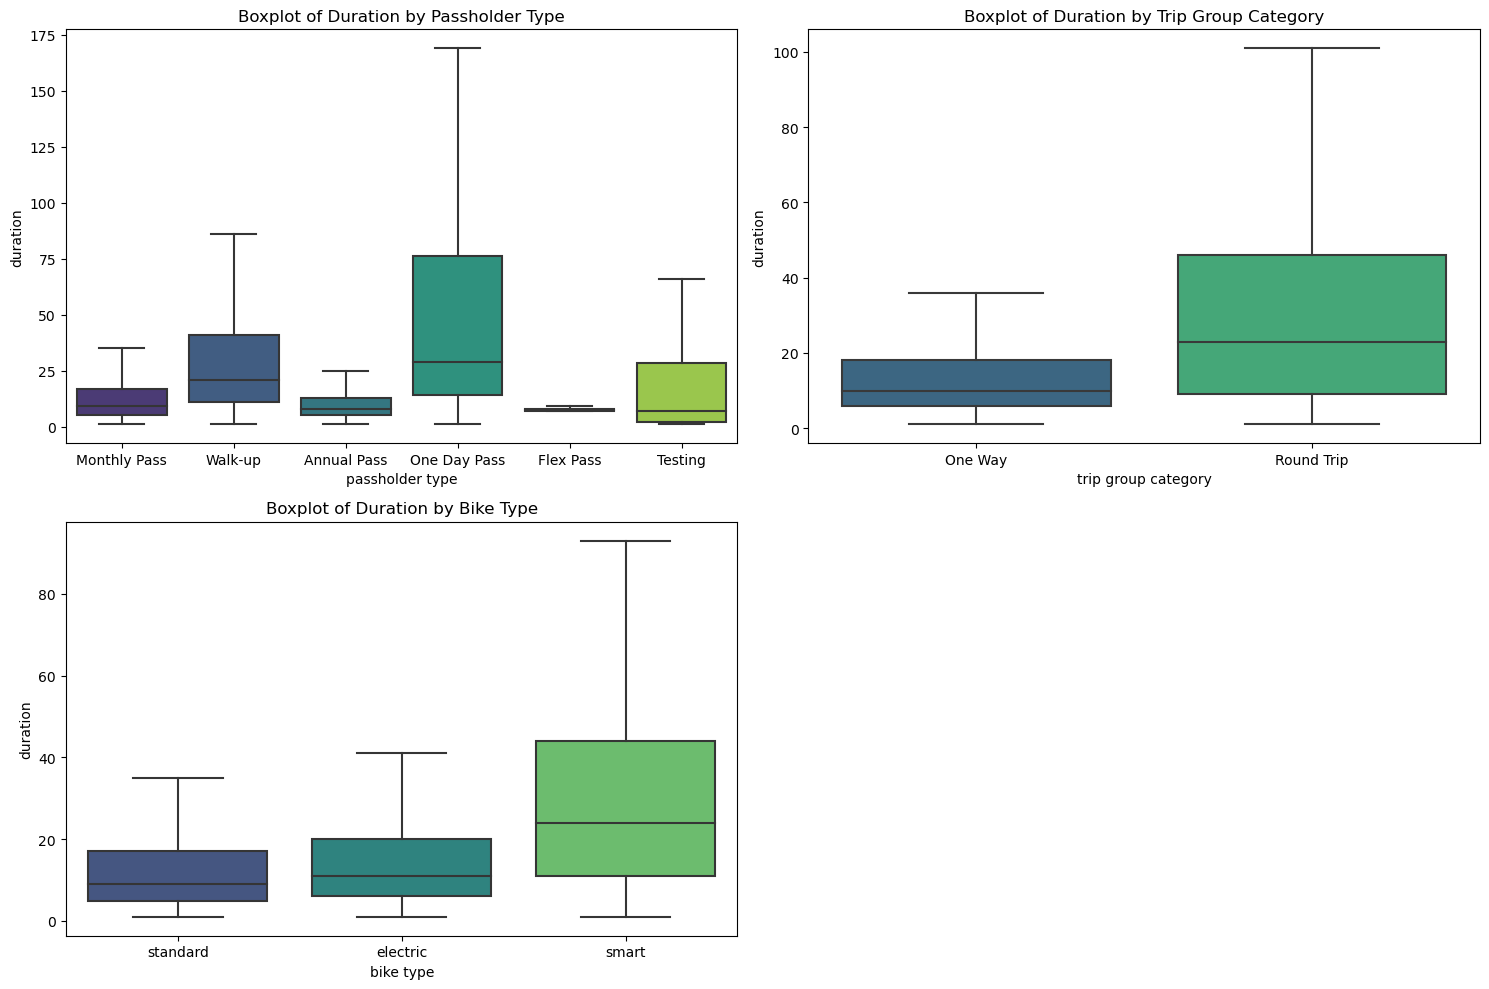

In [29]:
plt.figure(figsize=(15, 10))

# Create subplots 
plt.subplot(2, 2, 1)
sns.boxplot(x='passholder_type', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Passholder Type')
plt.xlabel('passholder type')
plt.ylabel('duration')

# subplots for the second boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x='trip_route_category', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Trip Group Category')
plt.xlabel('trip group category')
plt.ylabel('duration')

plt.subplot(2, 2, 3)
sns.boxplot(x='bike_type', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Bike Type')
plt.xlabel('bike type')
plt.ylabel('duration')

plt.tight_layout() 
plt.show()

These visualisations offer nuanced insights into the diverse patterns and characteristics of the bike-sharing service by examining how trip durations vary across different segments of the dataset.

The analysis of passholder types reveals intriguing variations in trip durations, suggesting potential distinctions in user behavior and preferences among the six passholder plans. Similarly, the examination of trip group categories elucidates notable differences in trip durations between 'One way' and 'Round Trip' categories, hinting at varying temporal patterns in these distinct journey types. 

The boxplot for the bike types provide a detailed understanding of how trip durations differ across standard pedal-powered bikes, electric-assist bikes, and smart bikes, potentially indicating diverse user experiences with different bike models.

These findings underscore the complexity of factors influencing trip durations within the bike-sharing service, offering valuable insights for service optimisation and user-centric enhancements. Future analyses and strategic decisions from the service can leverage these observations to tailor services, improve user experiences, and ensure efficient resource allocation.

#### 1.4.6 Pie Charts

We construct pie charts to visually represent the distribution of passholder types and bike types. This visual representation enables a clear understanding of the respective proportions within each category for two variables.

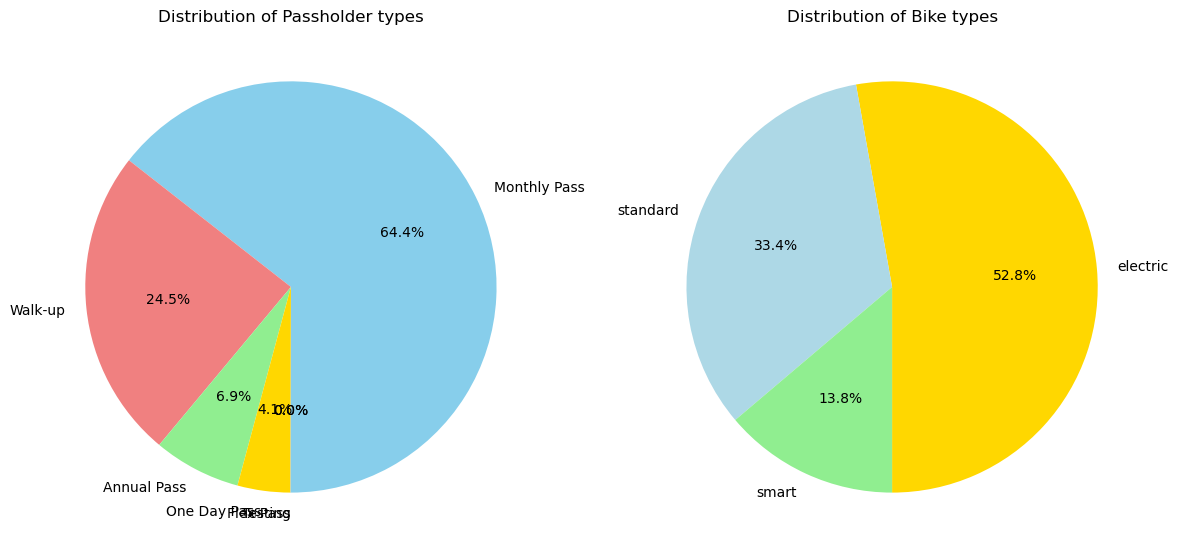

In [30]:
#calculating the counts for both variables 
passholder_counts = metrodata2['passholder_type'].value_counts()
bike_type_counts = metrodata2['bike_type'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Create subplots

# Plot 1st pie chart for 'passholder_type'
axs[0].pie(passholder_counts, labels=passholder_counts.index, autopct='%1.1f%%', startangle=-90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axs[0].set_title('Distribution of Passholder types')

# Plot 2nd pie chart for 'bike_type'
axs[1].pie(bike_type_counts, labels=bike_type_counts.index, autopct='%1.1f%%', startangle=-90, colors=['gold', 'lightblue', 'lightgreen'])
axs[1].set_title('Distribution of Bike types')
plt.tight_layout() 
plt.show()

The pie charts illustrate the distribution of passholder types and bike types within the dataset. 

In the 'Distribution of Passholder types' chart, Monthly passholders emerge as the majority of users, followed by Walk-Up passholders. Similarly, in the 'Distribution of Bike Types' chart, electric users dominate, with standard and smart users comprising the remaining portion.

These visualisations provide valuable insight into the relative proportions of different user and bike categories, offering an intuitive overview of the dataset's composition.

### 1.5 Discussion 

#### 1.5.1 Bike Usage Analysis 

We produce a set of visualisations to analyse bike usage patterns, average trip durations per bike, and the relationship between plan durations and passholder types. 

The first subplot features a bar chart displaying the distribution of bike usage based on the number of trips for each bike ID - offering insights into the popularity or use of each bike.

The second subplot in the middle presents a bar chart showcasing the average trip duration for each bike, distinguished by the orange colour. This chart helps identify variations in average trip durations across different bike types, similar to the first subplot.

The third subplot at the bottom consists of a stacked bar chart exploring the relationships between plan durations and passholder types. The stacked bars represent the number of trips for each combination of plan duration and passholder type. The chart offers insights into how different passholder types engage with various plan durations.

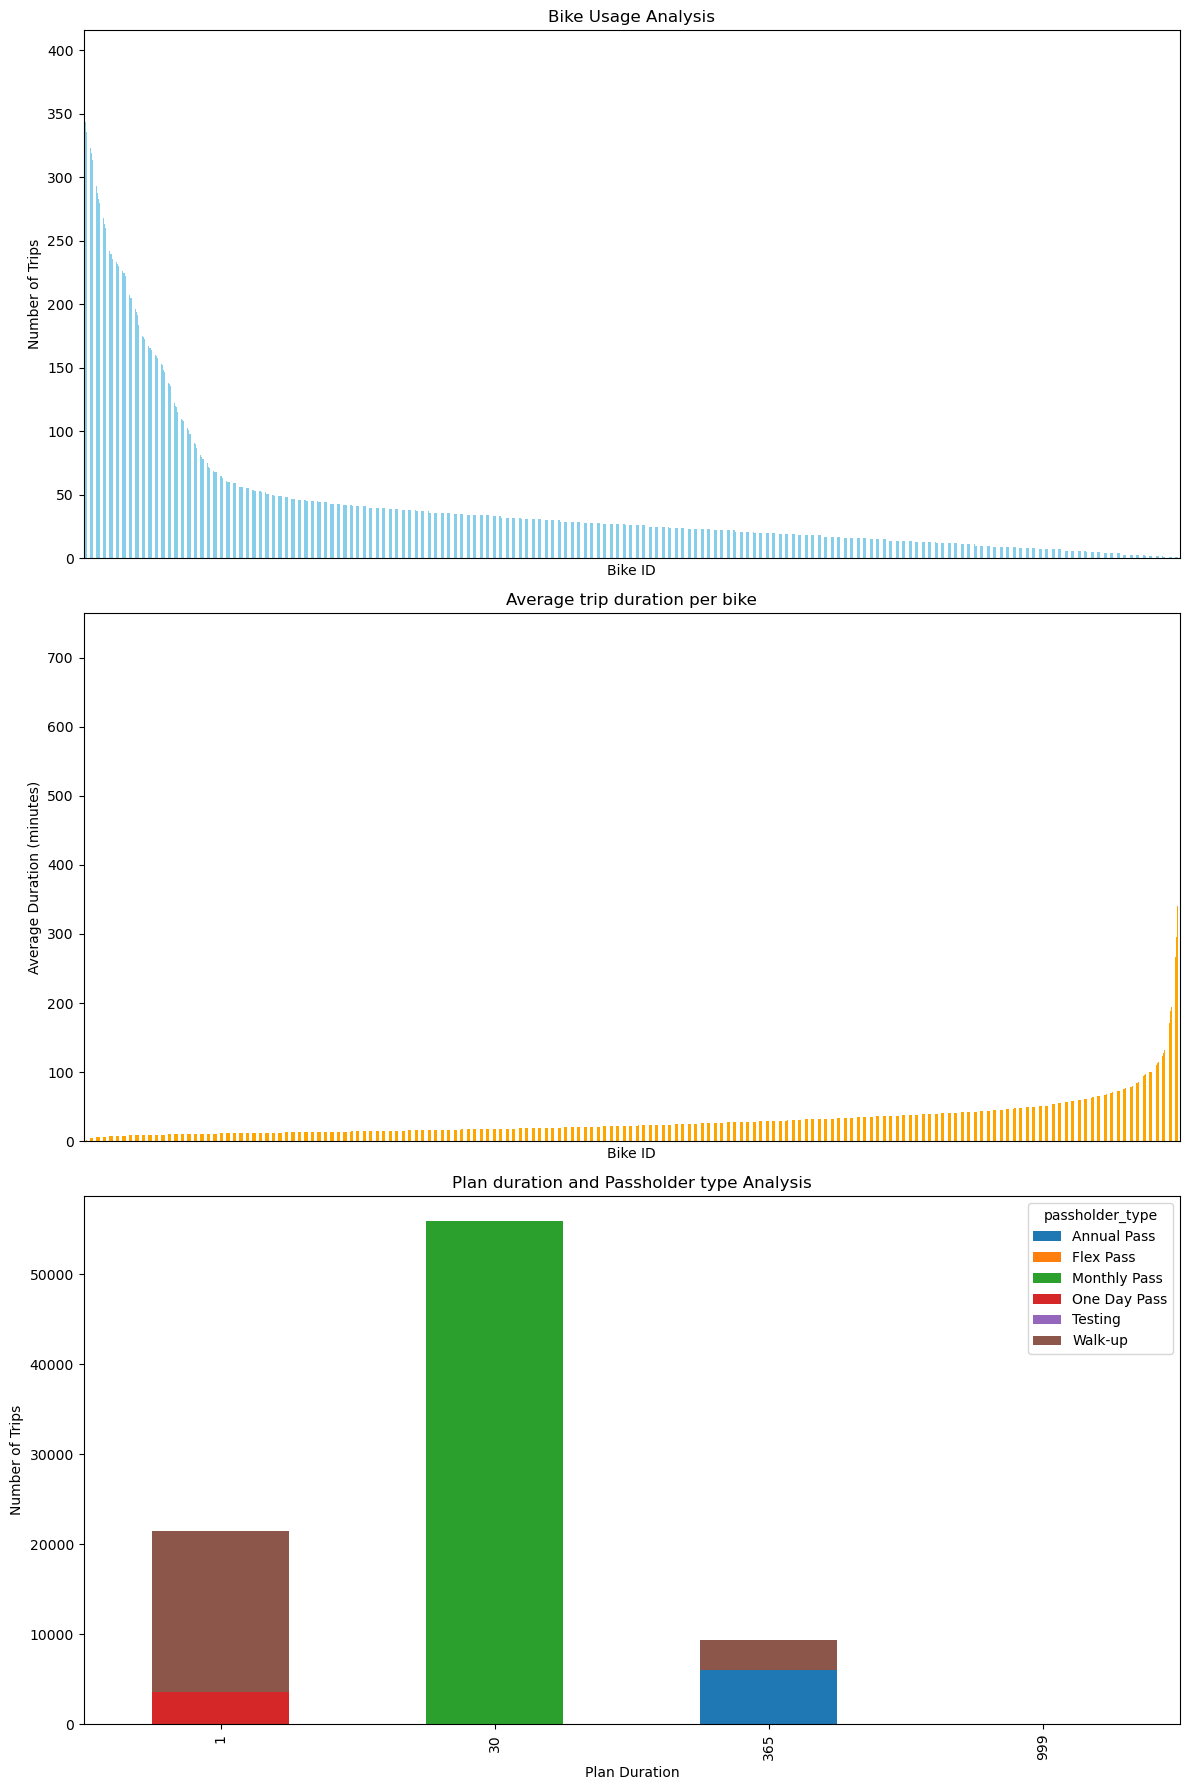

In [31]:
bike_usage = metrodata2['bike_id'].value_counts() #initialising count for the bike id

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot distribution of bike usage
bike_usage.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Bike Usage Analysis')
axes[0].set_xlabel('Bike ID')
axes[0].set_ylabel('Number of Trips')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# Calculate average trip duration for each bike
# x-axis ticks are hidden to simplify the visual display.

average_duration_per_bike = metrodata2.groupby('bike_id')['duration'].mean()

# Plot the average trip duration for each bike
average_duration_per_bike.sort_values().plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_title('Average trip duration per bike')
axes[1].set_xlabel('Bike ID')
axes[1].set_ylabel('Average Duration (minutes)')
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  

# Plan duration and passholder types
metrodata2.groupby(['plan_duration', 'passholder_type']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Plan duration and Passholder type Analysis')
axes[2].set_xlabel('Plan Duration')
axes[2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

The visualisations collectively offer a comprehensive overview of bike usage patterns, average trip durations, and the interplay between plan durations and passholder types. This visual exploration of key metrics related to bike usage provides valuable insights into patterns and variations within the dataset. The three subplots together provide a holistic view of the analysed aspects of the bike-sharing data.

In the first subplot, the distribution of bike usage based on the number of trips for each bike ID is revealed. Peaks in the bar chart may indicate frequently used bikes, while lower bars suggest less-used bikes. Further analysis could involve identifying specific bikes with unusually high or low usage, potentially influencing maintenance or retirement decisions.

The second subplot illustrates the average trip duration for each bike, highlighting diversity in trip durations across bikes. Bikes with longer average trip durations might be associated with leisurely rides, while those with shorter durations could be linked to more utilitarian use. This variation informs decisions related to bike maintenance, usability, and user preferences.

The third subplot, a stacked bar chart, explores the relationships between plan durations and passholder types. Each stacked bar represents the total number of trips for a specific combination of plan duration and passholder type. Varied colours within each bar denote the distribution of trips among different passholder types. This chart provides insights into how different passholder types engage with various plan durations, helping understand user preferences and behaviour. Such information is valuable for optimising subscription plans and tailoring offerings to different user segments.


#### 1.5.2 Cross Tabulation 

We further explore the relationship between passholder types and bike types through a combination of a cross-tabulation and a stacked bar chart.

The code generates a cross-tabulation between the "passholder_type" and "bike_type" columns of the "metrodata2" DataFrame, providing a tabular summary of counts for each passholder and bike type combination.

Using Seaborn, a heatmap is generated to visually represent the cross-tabulation. Each cell corresponds to a passholder and bike type combination, with colour intensity indicating the count. Annotations within cells enhance the interpretability of the heatmap.

Subsequently, a stacked bar chart is created based on the same cross-tabulation. The x-axis represents passholder types, while the y-axis represents the count of occurrences. Each bar is stacked to visualise the distribution of bike types within each passholder category.

The cross-tabulation offers a quick overview of how passholder types correlate with different bike types, while the stacked bar chart provides a more detailed breakdown. We can readily identify patterns, such as prevalent bike types among different passholder categories and any associations between specific passholder types and particular bike types.

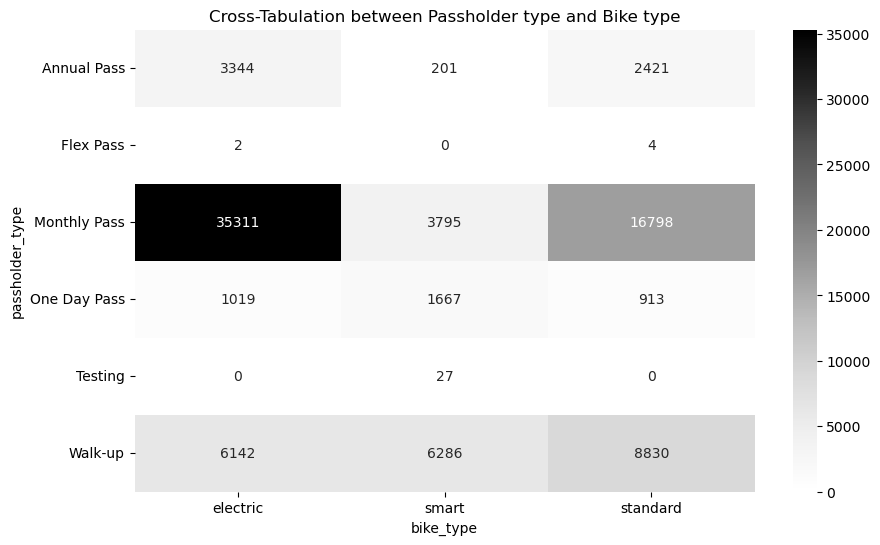

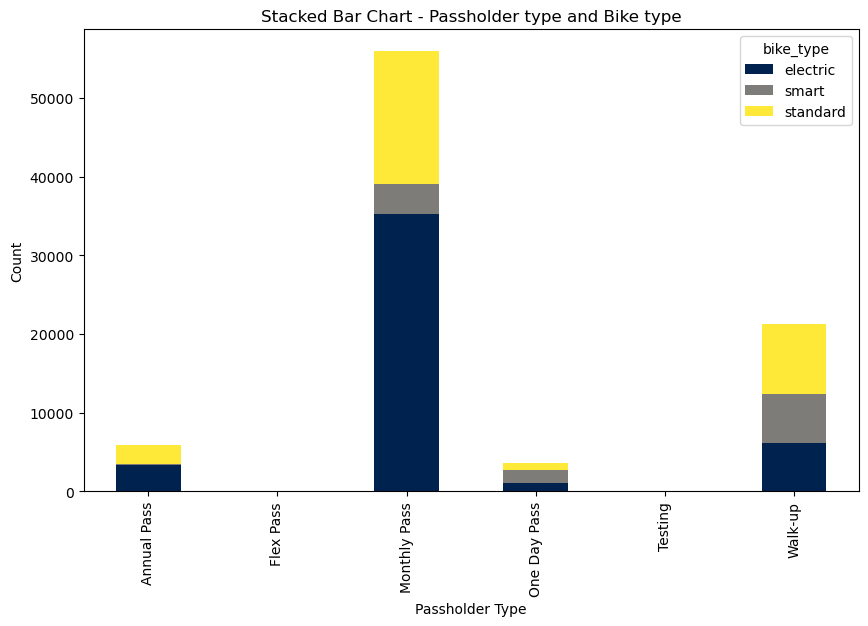

Cross-Tabulation between Passholder type & Bike type:
bike_type        electric  smart  standard
passholder_type                           
Annual Pass          3344    201      2421
Flex Pass               2      0         4
Monthly Pass        35311   3795     16798
One Day Pass         1019   1667       913
Testing                 0     27         0
Walk-up              6142   6286      8830


In [32]:
passholder_bike_crosstab = pd.crosstab(metrodata2['passholder_type'], metrodata2['bike_type'])

# Heatmap for the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(passholder_bike_crosstab, annot=True, cmap='Greys', fmt='d')
plt.title('Cross-Tabulation between Passholder type and Bike type')
plt.show()

# Stacked bar chart for the cross-tabulation
passholder_bike_crosstab.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10, 6))
plt.title('Stacked Bar Chart - Passholder type and Bike type')
plt.xlabel('Passholder Type')
plt.ylabel('Count')
plt.show()

# Display cross-tabulation
print("Cross-Tabulation between Passholder type & Bike type:")
print(passholder_bike_crosstab)


The cross-tabulation results between passholder types and bike types offer a detailed breakdown of occurrences for each combination. These observations provide valuable insights into how various passholder types interact with the available bike types, shedding light on potential patterns and preferences within the dataset.

Notably, electric bikes emerge as the most frequently used bike type across passholder categories, particularly favoured by Monthly Pass holders. Specific preferences for certain bike types are observed among passholders like Annual Pass holders, while others, such as Walk-up users, exhibit more varied preferences. Flex Pass holders, on the other hand, show minimal participation in bike usage compared to other passholder types.

A distinct pattern is observed among testing passholders, who exclusively use smart bikes.


#### 1.5.3 Time-Series Analysis 

We can prepare and visualise a time series of daily bike trips based on the "start_time" column in the "metrodata2" DataFrame. This plot will offer insights into the trend of bike trips over time, enabling us to observe patterns and fluctuations.

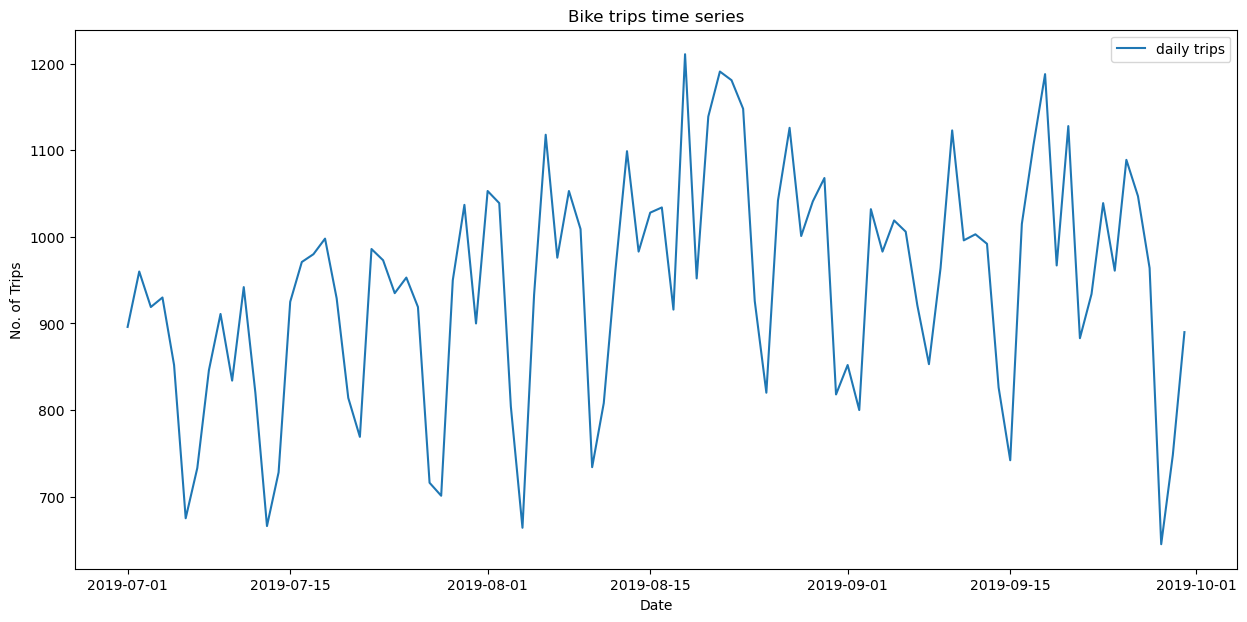

In [33]:
from datetime import datetime # import to convert 'start_time' and 'end_time' columns to datetime format

metrodata4 = metrodata2
metrodata4['start_time'] = pd.to_datetime(metrodata4['start_time'])
metrodata4['end_time'] = pd.to_datetime(metrodata4['end_time'])

# Set 'start_time' as index 
metrodata4.set_index('start_time', inplace=True)

# Resample data based on specific frequency 
daily_resampled = metrodata4.resample('D').size() #(daily in this case)

# Plot time series
plt.figure(figsize=(15, 7))
plt.plot(daily_resampled, label='daily trips')
plt.title('Bike trips time series')
plt.xlabel('Date')
plt.ylabel('No. of Trips')
plt.legend()
plt.show()

The graph illustrates the general trend of daily bike trips over the observed period. Upward trends suggest increasing popularity or ridership, while downward trends indicate a potential decrease. Repeating patterns or cycles in the graph may signify seasonality, reflecting variations in bike usage based on factors like weather, holidays, or events. Peaks and troughs at regular intervals might indicate weekly or monthly patterns.

Unusual spikes or dips could represent exceptional events, holidays, or anomalies affecting bike trip frequency. The overall height of the graph reflects the total volume of daily bike trips, offering insights into the system's usage intensity.

Examining the graph might reveal specific time periods with notable changes, providing insights into factors influencing bike usage. Identifying consistent patterns could assist in optimising services or predicting future demand.

### 1.6 Conclusion 

Our analysis of the bike trip data has proven to be both comprehensive and insightful, offering valuable insights that hold significant potential for enhancing services. The visualisations crafted during this analysis can emerge as indispensable tools for operations. They not only provide a clear overview of past trends but also offer ground for actionable insights that can drive strategic decisions for the future.

The applications of our findings can extend across various domains, notably in asset management, budgeting, and cost optimisation. By leveraging the patterns identified in the data, the company can make informed decisions on resource allocation, ensuring efficient asset utilisation and effective budget planning. The data-driven approach allows us to streamline costs effectively, contributing to the overall sustainability and profitability of the service.

Looking ahead, a strategic exploration of station locations becomes a pivotal aspect of the decision-making process. Analysing the geographical distribution of station visits can guide us in determining optimal locations for future installations. This forward-looking approach ensures that our service expansion aligns with user demand, promoting accessibility and user satisfaction.

Furthermore, delving into station visit frequencies opens avenues for proactive maintenance strategies. Identifying stations that are visited more often enables us to prioritise and schedule timely servicing, enhancing the overall reliability of our fleet. This predictive maintenance approach can not only minimise disruptions but also contributes to a seamless and dependable experience for our users.

Taking our analysis a step further, we can establish a usage threshold for bikes and implement a system to monitor their usage. By defining a threshold based on usage frequency, we can develop code that automatically flags bikes surpassing this limit. This innovative feature could not only ensure the timely maintenance of heavily used bikes but also supports our commitment to providing a high-quality and well-maintained fleet.

In summary, our analysis lays the foundation for data-driven decision-making, optimising various aspects of our bike-sharing service. Strategic expansion planning and proactive maintenance strategies, coupled to the insights gleaned from this analysis, can help enhance user experience and operational efficiency.